In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import os
% matplotlib inline
plt.ion()

import sys
sys.path.append('../')
import logomaker

In [2]:
def write_df_and_description(df, description, file_name, index=False, feedback=True):
    """ Write a data frame, with comment, to file"""
    
    # convert description to comment
    comment = '\n'.join(['# %s'%line.strip() for line in description.split('\n')])

    # remove file if it already exists
    if os.path.isfile(file_name):
        os.remove(file_name)        
    
    # open file for appending
    with open(file_name,'a') as f:
        
        # write comment
        f.write(comment+'\n')
        
        # write data frame
        df.to_csv(f, sep='\t', index=index)
    
    # provide feedback if desired
    if feedback:
        # show file name and location
        print('-> saving data to %s:'%file_name)
              
        # preview file
        with open(file_name,'r') as f:
            lines = f.readlines()
            head_length = min(len(lines),15)
            tail_length = min(len(lines),10)
            print(''.join(lines[:head_length]) + '...\n' + ''.join(lines[-tail_length:]))
            
    # compress, read in then write compressed file
    
    if file_name[-3:]=='.gz':

        # read in non-compressed file
        print('Compressing file...')
        with open(file_name,'rb') as f:
            tmp_file_name = 'tmp.gz'
            with gzip.open(tmp_file_name, 'wb') as g:
                g.writelines(f)
                
        # move tmp file to final file
        os.rename(tmp_file_name, file_name)
        print('Done!')

In [3]:
def write_txt_and_description(txt, description, file_name, index=False, feedback=True):
    """ Write a data frame, with comment, to file"""
    
    # convert description to comment
    comment = '\n'.join(['# %s'%line.strip() for line in description.split('\n')])

    # remove file if it already exists
    if os.path.isfile(file_name):
        os.remove(file_name)        
    
    # open file for appending
    with open(file_name,'a') as f:
        
        # write comment
        f.write(comment+'\n')
        
        # write data frame
        f.write(txt)
    
    # provide feedback if desired
    if feedback:
        # show file name and location
        print('-> saving data to %s:'%file_name)
              
        # preview file
        with open(file_name,'r') as f:
            lines = f.readlines()
            head_length = min(len(lines),15)
            tail_length = min(len(lines),10)
            print(''.join(lines[:head_length]) + '...\n' + ''.join(lines[-tail_length:]))

In [24]:
# Set output directories
data_dir = '../logomaker/examples/datafiles/'
mat_dir = '../logomaker/examples/matrices/'

# Saliency data

In [5]:
### Format saliency data

# write description
description =  """
Saliency values illustrated in Figure 1F.
Data are from Figure 1D of Janganathan et al. (2019), 
and were kindly provided by Kyle Farh and Kishore Jaganathan. 

References:

Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with 
Deep Learning. Cell. 176(3):535–548.e24. 
"""

# load saliency data 
data = np.load('importance_score.npz')
tmp_df = pd.DataFrame(data=data['arr_0'].T, columns=list('ACGT'))

# format saliency data
saliency_data_df = pd.DataFrame()
for i, row in tmp_df.iterrows():
    abs_vals = np.abs(row.values)
    col_num = np.argmax(abs_vals)
    saliency_data_df.loc[i,'character'] = tmp_df.columns[col_num]
    saliency_data_df.loc[i,'value'] = row.iloc[col_num]

# write data and description, then show file
write_df_and_description(df=saliency_data_df, 
                         description=description,
                         file_name=data_dir+'nn_saliency_values.txt')

-> saving data to ../logomaker/examples/datafiles/nn_saliency_values.txt:
# 
# Saliency values illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 176(3):535–548.e24.
# 
character	value
G	-0.0017247200012207031
G	0.03355717658996582
G	0.030026257038116455
G	0.012748241424560547
...
A	-0.004249751567840576
T	0.019003868103027344
A	-0.00032633543014526367
A	-0.010485649108886719
A	0.0017966628074645996
T	0.021005749702453613
T	0.019015133380889893
T	0.010700225830078125
T	0.010440587997436523
C	-0.01064610481262207



# Saliency matrix

In [6]:
### Compute saliency matrix

description = """
Saliency matrix illustrated in Figure 1F.
Data are from Figure 1D of Janganathan et al. (2019), 
and were kindly provided by Kyle Farh and Kishore Jaganathan. 

References:

Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with 
Deep Learning. Cell. 176(3):535–548.e24. 
"""

# load saliency data
with logomaker.open_example_datafile('nn_saliency_values.txt', print_description=False) as f:
    saliency_data_df = pd.read_csv(f, comment='#', sep='\t')

# create saliency matrix
saliency_mat_df = logomaker.saliency_to_matrix(seq=saliency_data_df['character'], 
                                               values=saliency_data_df['value'])

# write data and description, then show file
write_df_and_description(df=saliency_mat_df, 
                         description=description,
                         file_name=mat_dir+'nn_saliency_matrix.txt',
                         index=True)

-> saving data to ../logomaker/examples/matrices/nn_saliency_matrix.txt:
# 
# Saliency matrix illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 176(3):535–548.e24.
# 
pos	A	C	G	T
0	-0.0	-0.0	-0.0017247200012207033	-0.0
1	0.0	0.0	0.03355717658996582	0.0
2	0.0	0.0	0.03002625703811645	0.0
3	0.0	0.0	0.012748241424560549	0.0
...
119	-0.004249751567840576	-0.0	-0.0	-0.0
120	0.0	0.0	0.0	0.019003868103027344
121	-0.00032633543014526367	-0.0	-0.0	-0.0
122	-0.01048564910888672	-0.0	-0.0	-0.0
123	0.0017966628074645996	0.0	0.0	0.0
124	0.0	0.0	0.0	0.021005749702453613
125	0.0	0.0	0.0	0.01901513338088989
126	0.0	0.0	0.0	0.010700225830078123
127	0.0	0.0	0.0	0.010440587997436523
128	-0.0	-0.01064610481262207	-0.0	-0.0



Description of example matrix "nn_saliency_matrix":
# 
# Saliency matrix illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 176(3):535–548.e24.
# 



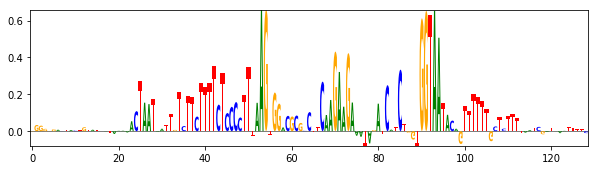

In [7]:
# Validate saliency matrix
df = logomaker.get_example_matrix('nn_saliency_matrix')
logomaker.Logo(df)

# CRP sites data

In [8]:
### Format CRP sites data

description = """
CRP binding sites from RegulonDB, in FASTA format.

References

Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary 
conservation, regulatory phrases, cross-validated gold standards 
and more. Nucl Acids Res. 41(Database issue):D203–13. 

"""

# load fasta file as txt
with open('crp_sites.fasta') as f:
    txt = f.read()
    
# write back as text with description header
write_txt_and_description(txt, description, data_dir+'crp_sites.fa')

-> saving data to ../logomaker/examples/datafiles/crp_sites.fa:
# 
# CRP binding sites from RegulonDB, in FASTA format.
# 
# References
# 
# Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary
# conservation, regulatory phrases, cross-validated gold standards
# and more. Nucl Acids Res. 41(Database issue):D203–13.
# 
# 
>0	caiFp	-41.5
ATAAGCAGGATTTAGCTCACACTTAT
>1	caiTp	-41.5
AAAAATGTGATACCAATCACAGAATA
>2	fixAp	-126.5
...
>353	idnDp	-41.5
AAAATTGTGATCTATATTTAACAAAG
>354	idnKp	-70.5
ATATTTAACAAAGTGATGACATTTCT
>355	idnDp	-91.5
AGTGATGACATTTCTGACGGCGTTAA
>356	nanCp	-61.5
AATTATTTGAACCAGATCGCATTACA
>357	nanCp	-61.5
TTAATTGTGATGTGTATCGAAGTGTG



# CRP counts matrix

In [9]:
### Create CRP counts matrix from FASTA file

description = """
CRP counts matrix. Created from the CRP binding sites from listed in RegulonDB.

References

Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary 
conservation, regulatory phrases, cross-validated gold standards 
and more. Nucl Acids Res. 41(Database issue):D203–13. 

"""

# load fasta of CRP binding sites
with logomaker.open_example_datafile('crp_sites.fa', print_description=False) as f:
    lines = f.readlines()
    
# extract binding site sequences
seqs = [seq.strip() for seq in lines if ('#' not in seq) and ('>') not in seq]

# create counts matrix
crp_counts_df = logomaker.alignment_to_matrix(sequences=seqs, to_type='counts')

# write counts matrix to file
write_df_and_description(df=crp_counts_df, 
                         description=description, 
                         file_name=mat_dir+'crp_counts_matrix.txt',
                         index=True)

-> saving data to ../logomaker/examples/matrices/crp_counts_matrix.txt:
# 
# CRP counts matrix. Created from the CRP binding sites from listed in RegulonDB.
# 
# References
# 
# Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary
# conservation, regulatory phrases, cross-validated gold standards
# and more. Nucl Acids Res. 41(Database issue):D203–13.
# 
# 
pos	A	C	G	T
0	133.0	65.0	72.0	88.0
1	147.0	46.0	58.0	107.0
2	166.0	26.0	38.0	128.0
3	164.0	28.0	43.0	123.0
...
16	33.0	31.0	31.0	263.0
17	46.0	261.0	15.0	36.0
18	250.0	30.0	44.0	34.0
19	62.0	244.0	16.0	36.0
20	231.0	36.0	46.0	45.0
21	97.0	68.0	51.0	142.0
22	120.0	40.0	20.0	178.0
23	116.0	44.0	24.0	174.0
24	90.0	54.0	40.0	174.0
25	103.0	62.0	60.0	133.0



Description of example matrix "crp_counts_matrix":
# 
# CRP counts matrix. Created from the CRP binding sites from listed in RegulonDB.
# 
# References
# 
# Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary
# conservation, regulatory phrases, cross-validated gold standards
# and more. Nucl Acids Res. 41(Database issue):D203–13.
# 
# 



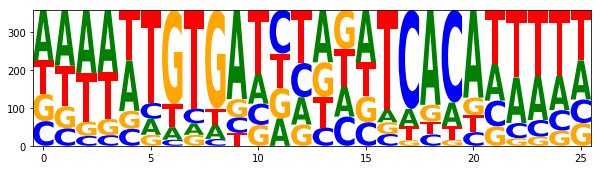

In [10]:
# validate crp counts matrix
df = logomaker.get_example_matrix('crp_counts_matrix')
logomaker.Logo(df)

# CRP energy matrix

In [11]:
### Format CRP energy matrix

# write description
description = """
CRP energy matrix from Kinney et al. (2010). 
Matrix values are in units of kcal/mol. 

References

Kinney JB et al. (2010) Using deep sequencing to characterize the 
biophysical mechanism of a transcriptional regulatory sequence. 
Proc Natl Acad Sci USA. 107(20):9158–63. 
"""

# load published energy matrix
energy_df = pd.read_csv('crp_tau_final_all.26.txt', delim_whitespace=True, index_col=0)
energy_df.columns = [c[-1] for c in energy_df.columns]
energy_df = logomaker.transform_matrix(energy_df, center_values=True)
energy_df = energy_df/1.62   # convert to kcal/mol

# save energy matrix with description
write_df_and_description(df=energy_df,
                         description=description,
                         file_name=mat_dir+'crp_energy_matrix.txt',
                         index=True)

-> saving data to ../logomaker/examples/matrices/crp_energy_matrix.txt:
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 
pos	A	C	G	T
0	-0.18364197530864196	0.15586419753086422	0.09413580246913582	-0.06635802469135801
1	-0.29012345679012347	0.2777777777777778	0.1111111111111111	-0.09876543209876544
2	-0.2762345679012346	0.316358024691358	0.16820987654320985	-0.20833333333333334
3	-0.22685185185185186	0.2854938271604938	0.2978395061728395	-0.35648148148148145
...
16	0.4444444444444444	0.3024691358024691	-0.049382716049382755	-0.6975308641975309
17	0.08024691358024698	-1.0987654320987652	0.6111111111111112	0.4074074074074075
18	-0.5864197530864197	0.3703703703703704	0.17901234567901236	0.03703703703703707
19	-0.17438271604938277	-0.6867283950617283	0.

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



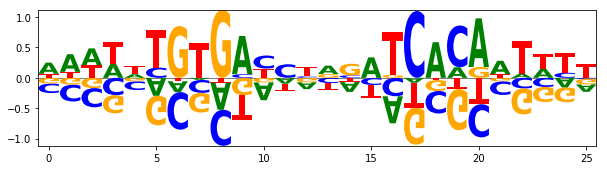

In [12]:
# validate crp energy matrix
df = logomaker.get_example_matrix('crp_energy_matrix')
logomaker.Logo(-df)

# WW domain sequences

In [13]:
### Fromat WW domain alignment

description = """
WW domain alignment in FASTA format.
From PFAM, RP15 (4025)
http://pfam.xfam.org/family/PF00397#tabview=tab3

References

Finn RD et al. (2014) Pfam: the protein families database. 
Nucl Acids Res. 42(Database issue):D222–30. 
"""

# load fasta file as txt
with open('Pfam_wwdomain.fa') as f:
    lines = f.readlines()
    
# Remove comments
lines = [line.strip() for line in lines if '#' not in line and len(line.strip())>0]
txt = '\n'.join(lines)
    
# write back as text with description header
write_txt_and_description(txt, description, data_dir+'ww_sequences.fa')

-> saving data to ../logomaker/examples/datafiles/ww_sequences.fa:
# 
# WW domain alignment in FASTA format.
# From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 
>B7G9D5/250-280
LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP
>B7G9D5/328-356
--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP
>B7G9D5/387-417
...
>A0A0D0AUR6/106-128
-----..--H.ISPL-...GRSYFVNHNT.......RTTSWKKP
>A0A0D0B2I1/93-115
-----..--Y.ISPL-...GRSYFVNHNT.......RTTSWKKP
>A0A0B2W0M5/472-501
LPAGW..EKH.QDPS-...GYSYYWHVDS.......GTIQREPP
>A0A1B7MQV1/109-126
-----..---.-----...GRSYFVNHNT.......RTTSWKKP
>A0A0D0APJ1/108-130
-----..--H.ISPL-...GRSYFVNHNT.......KTTSWRKP


# WW information matrix

In [14]:
### Format WW domain sequences

description = """
WW domain information matrix (in bits). 
Counts derived From PFAM, RP15 (4025)
http://pfam.xfam.org/family/PF00397#tabview=tab3
Note: Positions with gaps in at least half of the 
sequences were removed. 

References

Finn RD et al. (2014) Pfam: the protein families database. 
Nucl Acids Res. 42(Database issue):D222–30. 
"""

# read in fasta file
with logomaker.open_example_datafile('ww_sequences.fa', print_description=False) as f:
    lines = f.readlines()

# extract ww domain sequences
seqs = [seq.strip().upper() for seq in lines if ('#' not in seq) and ('>') not in seq]

# create counts matrix
ww_counts_df = logomaker.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='.-X')

# filter base on counts
num_seqs = ww_counts_df.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
ww_counts_df = ww_counts_df[pos_to_keep]
ww_counts_df.reset_index(drop=True, inplace=True)

# transform to information matrix
ww_info_df = logomaker.transform_matrix(ww_counts_df, from_type='counts', to_type='information')

# write counts matrix to file
write_df_and_description(df=ww_info_df, 
                         description=description, 
                         file_name=mat_dir+'ww_information_matrix.txt',
                         index=True)

-> saving data to ../logomaker/examples/matrices/ww_information_matrix.txt:
# 
# WW domain information matrix (in bits).
# Counts derived From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# Note: Positions with gaps in at least half of the
# sequences were removed.
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 
pos	A	C	D	E	F	G	H	I	K	L	M	N	P	Q	R	S	T	V	W	Y
0	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	4.013829754302133	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.001591526468795453	0.06843563815820448	0.001591526468795453	0.001591526468795453
1	0.03497481914499014	0.0013989927657996053	0.0013989927657996053	0.020984891486994083	0.006994963828998028	0.012590934

Description of example matrix "ww_information_matrix":
# 
# WW domain information matrix (in bits).
# Counts derived From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# Note: Positions with gaps in at least half of the
# sequences were removed.
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 



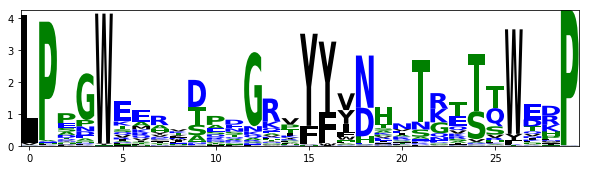

In [15]:
# validate ww domain file
df = logomaker.get_example_matrix('ww_information_matrix')
logomaker.Logo(df)

# 5'ss sequences

In [25]:
### Format 5' ss sequences

# set file header
description = """
5'ss sequences in the human genome. 
The number of times each 5'ss occurs in the genome is also provided.
Sequences were parsed from hg38 using GENCODE annotation. 
Only sequences of the form NNNGYNNNN are listed.  

References

Frankish A et al. (2019) GENCODE reference annotation 
for the human and mouse genomes. Nucl Acids Res. 47(D1):D766–73. 
"""

# load all splice sites
tmp1_df = pd.read_csv('hg38_sss.txt.gz', sep='\t', index_col=0)

# get 5' splice sites
seqs = [s.replace('T','U') for s in tmp1_df['ss5_seq'] if s[3:5] in {'GC','GT'}]
tmp2_df = pd.DataFrame(data=seqs, columns=['sequence'])

# uniquify sequence list
tmp2_df['count'] = 1
ss_seqs_df = tmp2_df.groupby('sequence').sum()
ss_seqs_df.sort_values(by='count', ascending=False, inplace=True)
ss_seqs_df.reset_index(inplace=True)

# write to file
write_df_and_description(df=ss_seqs_df,
                         description=description,
                         file_name=data_dir+'ss_sequences.txt')

-> saving data to ../logomaker/examples/datafiles/ss_sequences.txt:
# 
# 5'ss sequences in the human genome.
# The number of times each 5'ss occurs in the genome is also provided.
# Sequences were parsed from hg38 using GENCODE annotation.
# Only sequences of the form NNNGYNNNN are listed.
# 
# References
# 
# Frankish A et al. (2019) GENCODE reference annotation
# for the human and mouse genomes. Nucl Acids Res. 47(D1):D766–73.
# 
sequence	count
CAGGUGAGU	3729
CAGGUGAGG	3653
CAGGUGAGC	3090
...
GCUGUAACA	1
GCUGCUGGC	1
GCUGUAAAC	1
GCUGUAAAA	1
GCUGCUUUG	1
GCUGCUUGG	1
CAAGUAGCG	1
CAAGUAGUG	1
CAAGUAGUU	1
CUGGUUCUC	1



# 5'ss probability matrix

In [17]:
### Generate 5'ss probability matrix

description = """
Probability matrix for all 5'ss sequences in the human genome. 
Sequences were parsed from hg38 using GENCODE annotation. 
Only sequences of the form NNNGYNNNN were considered.  

References

Frankish A et al. (2019) GENCODE reference annotation 
for the human and mouse genomes. Nucl Acids Res. 47(D1):D766–73. 
"""

# load sequence dataframe
with logomaker.open_example_datafile('ss_sequences.txt', print_description=False) as f:
    seq_df = pd.read_csv(f, delim_whitespace=True, comment='#')

# compute probability matrix
prob_df = logomaker.alignment_to_matrix(sequences=seq_df['sequence'], 
                                        counts=seq_df['count'],
                                        to_type='probability',
                                        pseudocount=0)

# save probability matrix
write_df_and_description(df=prob_df, 
                         description=description, 
                         file_name='ss_probability_matrix.txt', 
                         index=True)

-> saving data to ss_probability_matrix.txt:
# 
# Probability matrix for all 5'ss sequences in the human genome.
# Sequences were parsed from hg38 using GENCODE annotation.
# Only sequences of the form NNNGYNNNN were considered.
# 
# References
# 
# Frankish A et al. (2019) GENCODE reference annotation
# for the human and mouse genomes. Nucl Acids Res. 47(D1):D766–73.
# 
pos	A	C	G	U
0	0.32465600595016736	0.3589800287457409	0.18931315100894872	0.12705081429514303
1	0.6285601332087014	0.1108453191011763	0.12065840477889567	0.13993614291122658
2	0.10533739392051032	0.0275965813340302	0.7941429715323356	0.07292305321312387
3	0.0	0.0	1.0	0.0
...
pos	A	C	G	U
0	0.32465600595016736	0.3589800287457409	0.18931315100894872	0.12705081429514303
1	0.6285601332087014	0.1108453191011763	0.12065840477889567	0.13993614291122658
2	0.10533739392051032	0.0275965813340302	0.7941429715323356	0.07292305321312387
3	0.0	0.0	1.0	0.0
4	0.0	0.028156084682674495	0.0	0.9718439153173255
5	0.5726332505804429	0.0385755

Description of example matrix "ss_probability_matrix":
# 
# Probability matrix for all 5'ss sequences in the human genome.
# Sequences were parsed from hg38 using GENCODE annotation.
# Only sequences of the form NNNGYNNNN were considered.
# 
# References
# 
# Frankish A et al. (2019) GENCODE reference annotation
# for the human and mouse genomes. Nucl Acids Res. 47(D1):D766–73.
# 



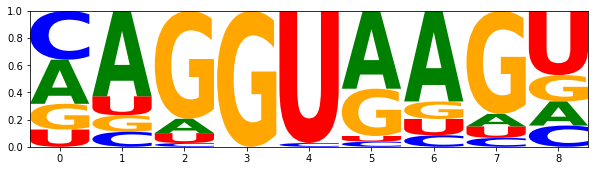

In [18]:
### Validate 5'ss matrix
df = logomaker.get_example_matrix('ss_probability_matrix')
logomaker.Logo(df)

# ARS wt sequence

In [19]:
### ARS wt sequence

description = """
ARS1 (a.k.a. ARS416) wild-type sequence.
On S. cerevisiae S288C chromosome IV
Sequence ID: NC_001136.10
position: [462475:462624] (150 bp)
strand: minus
"""

# define reverse complement function
def rc(seq):
    """Reverse-complements a DNA sequence"""
    complement = str.maketrans('ATCGN', 'TAGCN')
    return str(seq).upper().translate(complement)[::-1]

# define sequence
ars416 = rc(
    'tctaacaaaatagcaaatttcgtcaaaaatgctaagaaataggtt'
    'attactgagtagtatttatttaagtattgtttgtgcacttgcctg'
    'caggccttttgaaaagcaagcataaaagatctaaacataaaatct'
    'gtaaaataacaagat'.upper())

# write to file
write_txt_and_description(txt=ars416, 
                          description=description, 
                          file_name=data_dir+'ars_wt_sequence.txt')

-> saving data to ../logomaker/examples/datafiles/ars_wt_sequence.txt:
# 
# ARS1 (a.k.a. ARS416) wild-type sequence.
# On S. cerevisiae S288C chromosome IV
# Sequence ID: NC_001136.10
# position: [462475:462624] (150 bp)
# strand: minus
# 
ATCTTGTTATTTTACAGATTTTATGTTTAGATCTTTTATGCTTGCTTTTCAAAAGGCCTGCAGGCAAGTGCACAAACAATACTTAAATAAATACTACTCAGTAATAACCTATTTCTTAGCATTTTTGACGAAATTTGCTATTTTGTTAGA...
# 
# ARS1 (a.k.a. ARS416) wild-type sequence.
# On S. cerevisiae S288C chromosome IV
# Sequence ID: NC_001136.10
# position: [462475:462624] (150 bp)
# strand: minus
# 
ATCTTGTTATTTTACAGATTTTATGTTTAGATCTTTTATGCTTGCTTTTCAAAAGGCCTGCAGGCAAGTGCACAAACAATACTTAAATAAATACTACTCAGTAATAACCTATTTCTTAGCATTTTTGACGAAATTTGCTATTTTGTTAGA


# ARS selection data

In [20]:
### Format ARS1 data
def get_ars_df(file_name):
    
    # open file
    with gzip.open(file_name, 'r') as f:
        txt = [x.decode("utf-8") for x in f]
    
    # extract counts and sequences
    counts = np.array([int(str(name).strip().split('-')[-1]) for name in txt if '>' in name])
    seqs = [str(s).strip() for s in txt if '>' not in s]
    
    # format as dataframe
    df = pd.DataFrame()
    df['sequence'] = seqs
    df['count'] = counts
    return df

# load both background and forground data
bg_df = get_ars_df('ARS416_09_B1.qcfilt.aln.full.gz')
fg_df = get_ars_df('ARS416_09_B2.qcfilt.aln.full.gz')

# merge and format ars data
ars_df = pd.merge(bg_df, fg_df, on='sequence', how='outer').fillna(0)
ars_df.rename(columns={'count_x':'library_ct', 'count_y':'selected_ct'}, inplace=True)
ars_df = ars_df[['library_ct', 'selected_ct', 'sequence']]
ars_df.iloc[:,[0,1]] = ars_df.iloc[:,[0,1]].astype(int)

# write description
description = """
ARS1 selection data (unpublished).
Collected by JBK from an experiment analogous to the 
arsMut-seq assay described by Liachko et al. (2013). 

Reference:

Liachko I et al. (2013) High-resolution mapping, characterization, and optimization 
of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704. 
"""

# write df to file
write_df_and_description(df=ars_df, 
                         description=description, 
                         file_name=data_dir+'ars_sequences.txt.gz', 
                         index=False)

-> saving data to ../logomaker/examples/datafiles/ars_sequences.txt.gz:
# 
# ARS1 selection data (unpublished).
# Collected by JBK from an experiment analogous to the
# arsMut-seq assay described by Liachko et al. (2013).
# 
# Reference:
# 
# Liachko I et al. (2013) High-resolution mapping, characterization, and optimization
# of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704.
# 
library_ct	selected_ct	sequence
666	0	TCTAACAAAATAGCAAATTTCGTCAAAAATGCTAAGAAATGGGTTATTATTGGGTAGTATTTATGTGAGTCTTGTTCGTGCACTTGCCCGCAGGCATGTTGCAAACCAAGCATAAAAGATCTAAACATAGAATCTGTCAAATAACCAGAT
292	0	TCTAACAAAATAGCAAATTTCGTCGAAAATGTTTAGAAAAAGGTTATTACTGAGTAGTATTTATTTATGTATTGATTGTGCAATTGCCTGGAGGCCTTTTGAAACGAAAGCATAAAAGATCTAAACATAAACTCTGTAAAATAACAAGAT
224	0	TCTAACAAAATAGCAAATTTCGTCAAAAATGCAATGAAAGCGGATATTACTTAGTGGTATTTATTTAAGTATTGTTTGTGCACTTGCCTGCAGGCCTTTAGAATAGCAAGCATAAAAGACCTAAACATAAAATCTGTAAAATAACAAGAT
188	0	TCTAACAAAATAGCAAATTTCGGCAAAAATGCTAAGAAATAGGTTATTACAGAGTAGAATTTATGTACGTATTGTTTGTGCAAT

In [21]:
# write df to file
write_df_and_description(df=ars_df, 
                         description=description, 
                         file_name=data_dir+'ars_sequences.txt.gz', 
                         index=False)

-> saving data to ../logomaker/examples/datafiles/ars_sequences.txt.gz:
# 
# ARS1 selection data (unpublished).
# Collected by JBK from an experiment analogous to the
# arsMut-seq assay described by Liachko et al. (2013).
# 
# Reference:
# 
# Liachko I et al. (2013) High-resolution mapping, characterization, and optimization
# of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704.
# 
library_ct	selected_ct	sequence
666	0	TCTAACAAAATAGCAAATTTCGTCAAAAATGCTAAGAAATGGGTTATTATTGGGTAGTATTTATGTGAGTCTTGTTCGTGCACTTGCCCGCAGGCATGTTGCAAACCAAGCATAAAAGATCTAAACATAGAATCTGTCAAATAACCAGAT
292	0	TCTAACAAAATAGCAAATTTCGTCGAAAATGTTTAGAAAAAGGTTATTACTGAGTAGTATTTATTTATGTATTGATTGTGCAATTGCCTGGAGGCCTTTTGAAACGAAAGCATAAAAGATCTAAACATAAACTCTGTAAAATAACAAGAT
224	0	TCTAACAAAATAGCAAATTTCGTCAAAAATGCAATGAAAGCGGATATTACTTAGTGGTATTTATTTAAGTATTGTTTGTGCACTTGCCTGCAGGCCTTTAGAATAGCAAGCATAAAAGACCTAAACATAAAATCTGTAAAATAACAAGAT
188	0	TCTAACAAAATAGCAAATTTCGGCAAAAATGCTAAGAAATAGGTTATTACAGAGTAGAATTTATGTACGTATTGTTTGTGCAAT

# ARS enrichment matrix

In [22]:
## Compute ARS matrix

# set description
description = """
ARS1 enrichment matrix.
From unpublished data collected by JBK, from an experiment analogous
to the arsMut-seq assay described by Liachko et al. (2013). 

Reference:

Liachko I et al. (2013) High-resolution mapping, characterization, and optimization 
of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704. 
"""

# load ars selection data
with logomaker.open_example_datafile('ars_sequences.txt.gz', print_description=False) as f:
    ars_df = pd.read_csv(f, sep='\t', comment='#')

# compute probability matrices from alignments
bg_df = logomaker.alignment_to_matrix(sequences=ars_df['sequence'], 
                                      counts=ars_df['library_ct'], 
                                      to_type='probability')
fg_df = logomaker.alignment_to_matrix(sequences=ars_df['sequence'], 
                                      counts=ars_df['selected_ct'], 
                                      to_type='probability')

# compute enrichment matrix, center, and reverse-complement
enrichment_df = np.log2(fg_df/bg_df)
enrichment_df = logomaker.transform_matrix(enrichment_df, center_values=True)
enrichment_df.loc[:,:] = enrichment_df.values[::-1,::-1]

# save enrichment matrix
write_df_and_description(df=enrichment_df, 
                         description=description,
                         file_name=mat_dir+'ars_enrichment_matrix.txt',
                         index=True)

-> saving data to ../logomaker/examples/matrices/ars_enrichment_matrix.txt:
# 
# ARS1 enrichment matrix.
# From unpublished data collected by JBK, from an experiment analogous
# to the arsMut-seq assay described by Liachko et al. (2013).
# 
# Reference:
# 
# Liachko I et al. (2013) High-resolution mapping, characterization, and optimization
# of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704.
# 
pos	A	C	G	T
0	0.06289044538461087	-0.17457791973116166	-0.08827744456839261	0.1999649189149434
1	0.5053118843452795	-0.38052071601400184	-0.09930254597241894	-0.025488622358858775
2	0.3249559382230771	-0.2236892757859591	-0.22238592467840845	0.12111926224129044
3	-0.06275561844795949	-0.11743157592129255	0.004755662058099047	0.17543153231115294
...
140	0.7004668568139971	-0.04671635746357278	-1.1534011786514304	0.49965067930100626
141	-0.22560653908605502	0.014853017592215578	0.3915989094062299	-0.1808453879123905
142	-0.23738657625029602	-0.007163404794385431	-0.0187032

Description of example matrix "ars_enrichment_matrix":
# 
# ARS1 enrichment matrix.
# From unpublished data collected by JBK, from an experiment analogous
# to the arsMut-seq assay described by Liachko et al. (2013).
# 
# Reference:
# 
# Liachko I et al. (2013) High-resolution mapping, characterization, and optimization
# of autonomously replicating sequences in yeast. Genome Res. 23(4):698–704.
# 



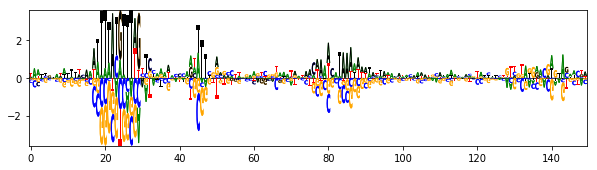

In [23]:
### Validate ARS1 enrichment matrix
df = logomaker.get_example_matrix('ars_enrichment_matrix')
logo = logomaker.Logo(df)
logo.style_glyphs_in_sequence(sequence=ars416, color='black')